<a href="https://colab.research.google.com/github/ruthishkumar18/Steel_Surface_Defect_Detection_Using_YOLO11/blob/main/2_Severstal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Severstal Dataset Training**

In [ ]:
!nvidia-smi

Sat Mar 22 13:13:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
from google.colab.drive import mount
mount('/content/drive')

Mounted at /content/drive


### Severstal 10000 images datasets

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="38qC8n7h0Zy1KvGZh2eh")
project = rf.workspace("workspace3-773no").project("severstal-aug-v2")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to severstal-aug-v2-1 in yolov11:: 100%|██████████| 47970/47970 [00:11<00:00, 4063.56it/s]


In [ ]:
yaml_file = "/content/dataset/ALLFINALSEVERSTALDATASET/data.yaml"

In [ ]:
dataset.location

'/content/severstal-aug-v2-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11m.pt" epochs=5 imgsz=224

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/severstal-aug-v2-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [ ]:
import shutil
from google.colab import files
from datetime import datetime

# Define the folder path
runs_dir = '/content/runs'  # replace with your output directory path

# Zip the folder
zip_file_name = f'runs{datetime.now()}'
shutil.make_archive(zip_file_name, 'zip', runs_dir)


'/content/runs2025-03-22 13:37:27.403795.zip'

In [ ]:
from google.colab import files

# Download the zip file
files.download(f'{zip_file_name}.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step # 05 Examine Training Results**

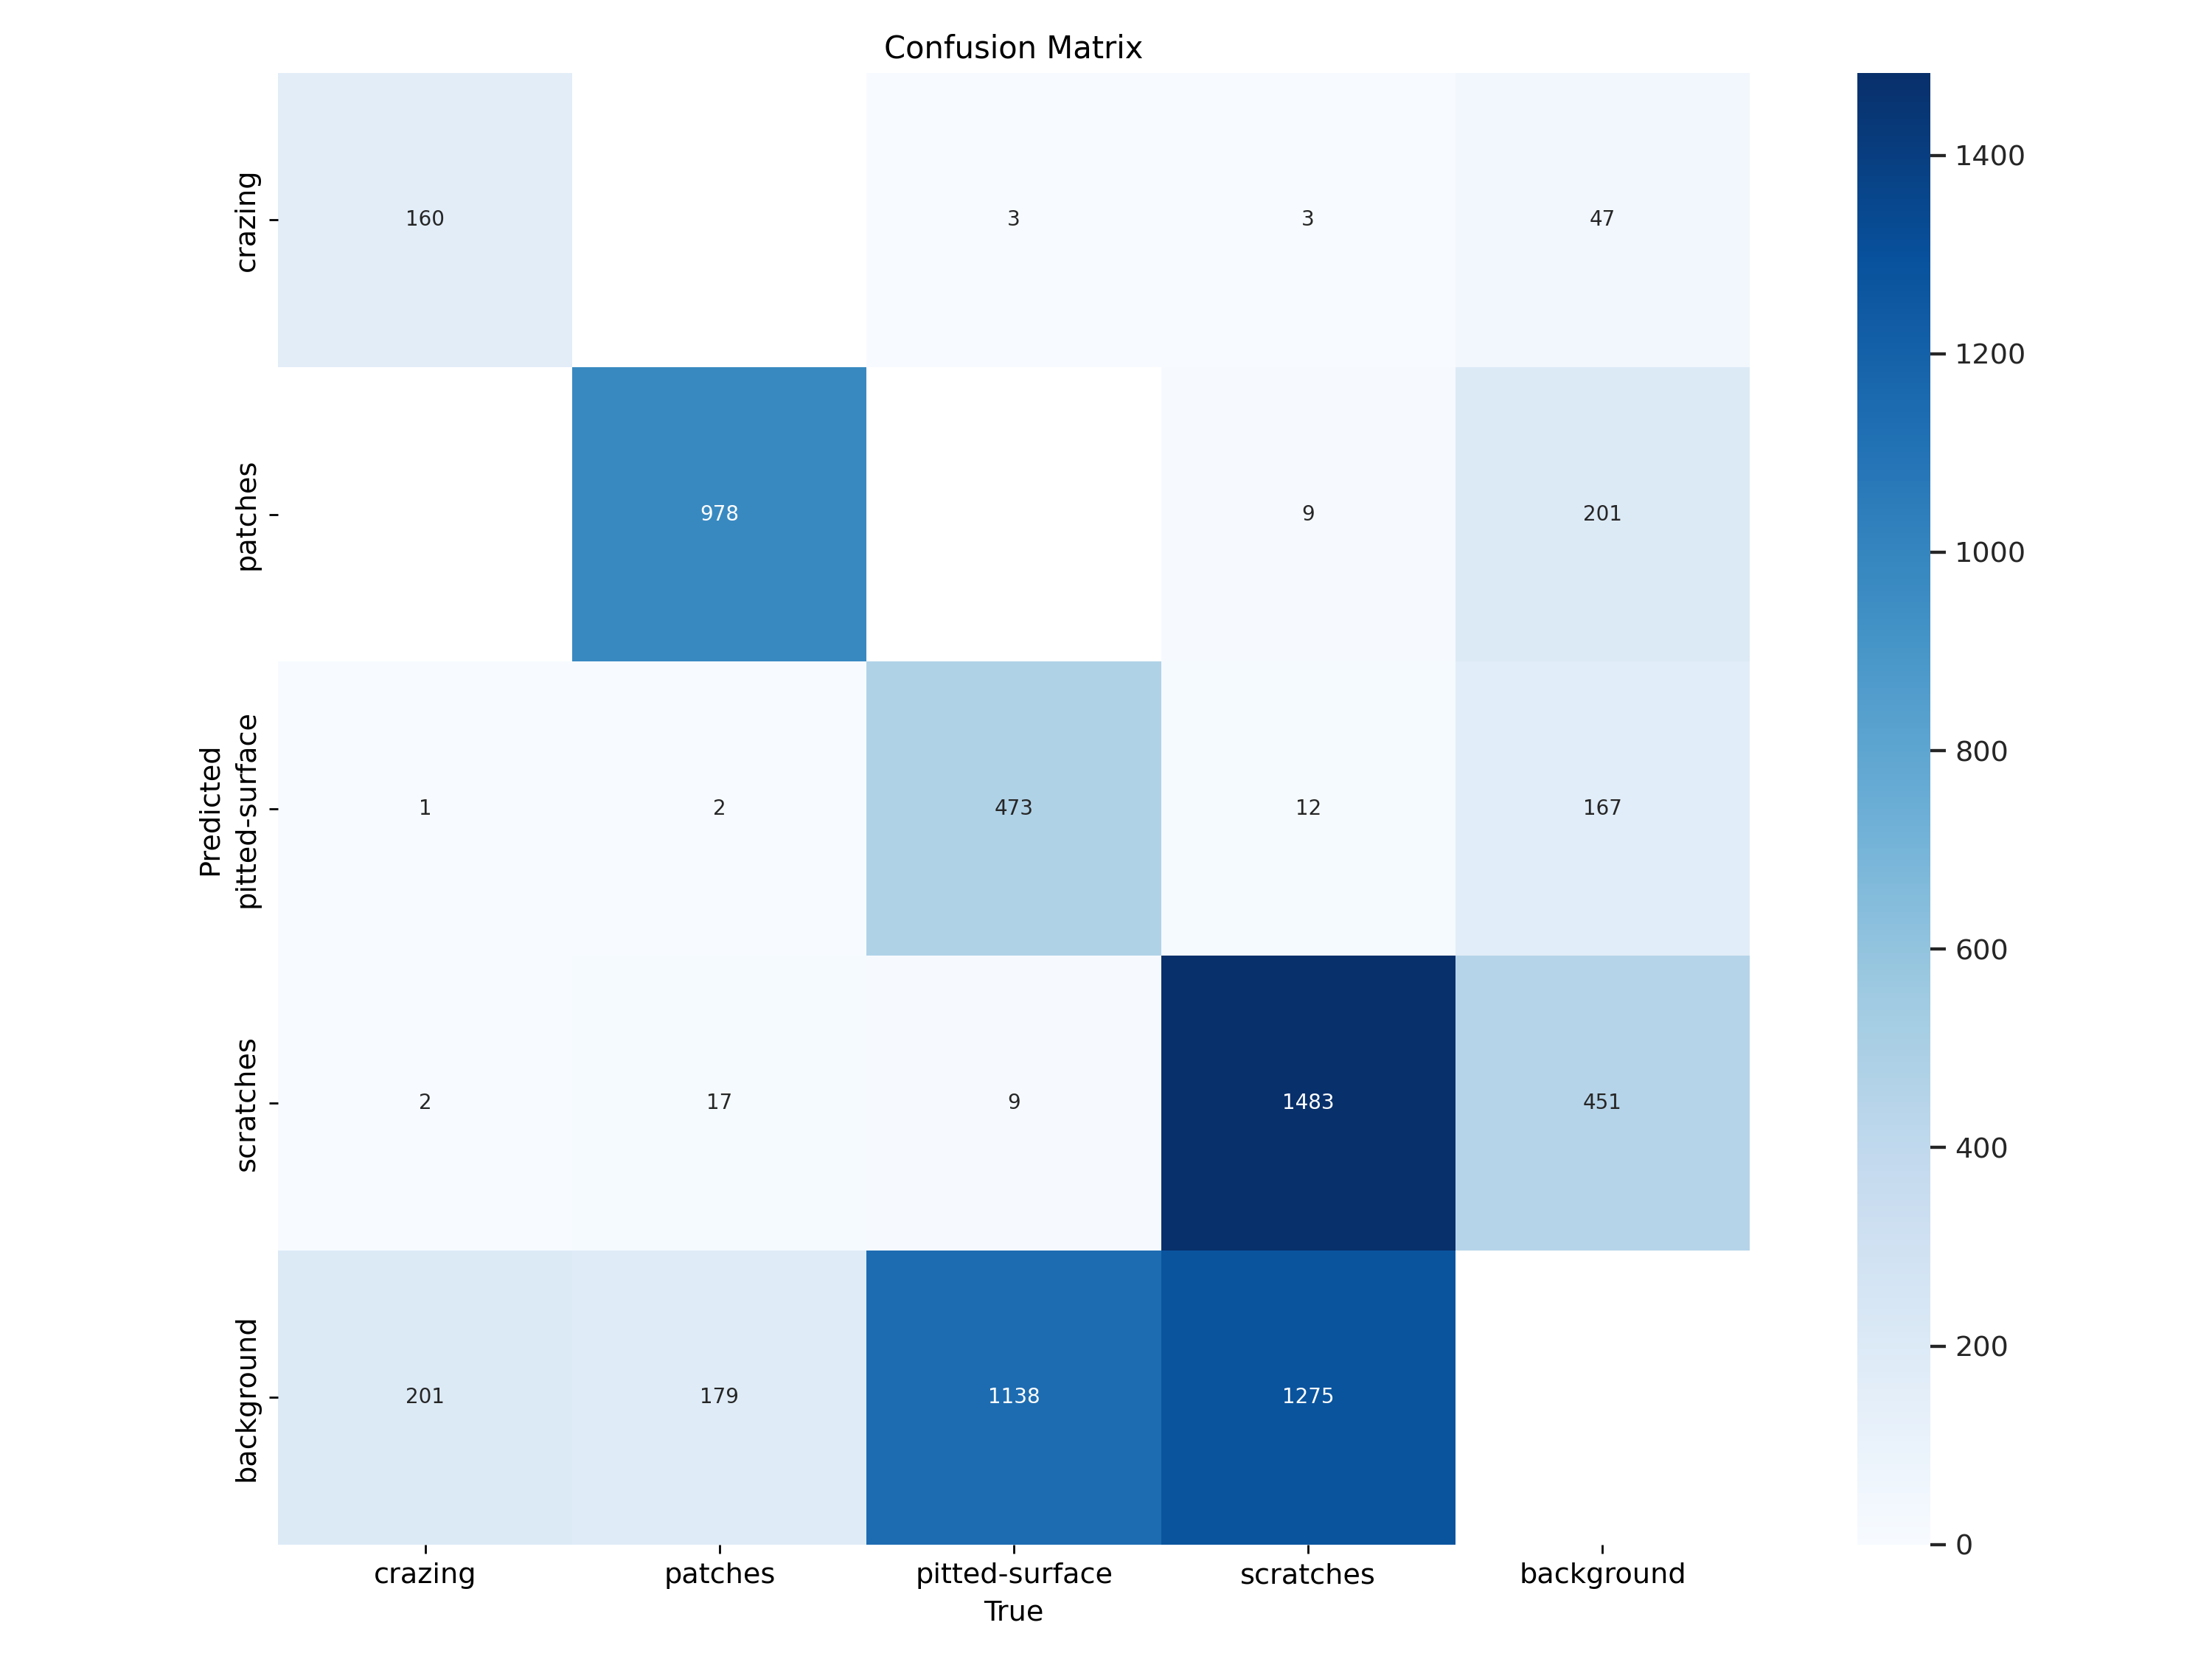

In [ ]:
Image("/content/confusion_matrix.png", width=600)

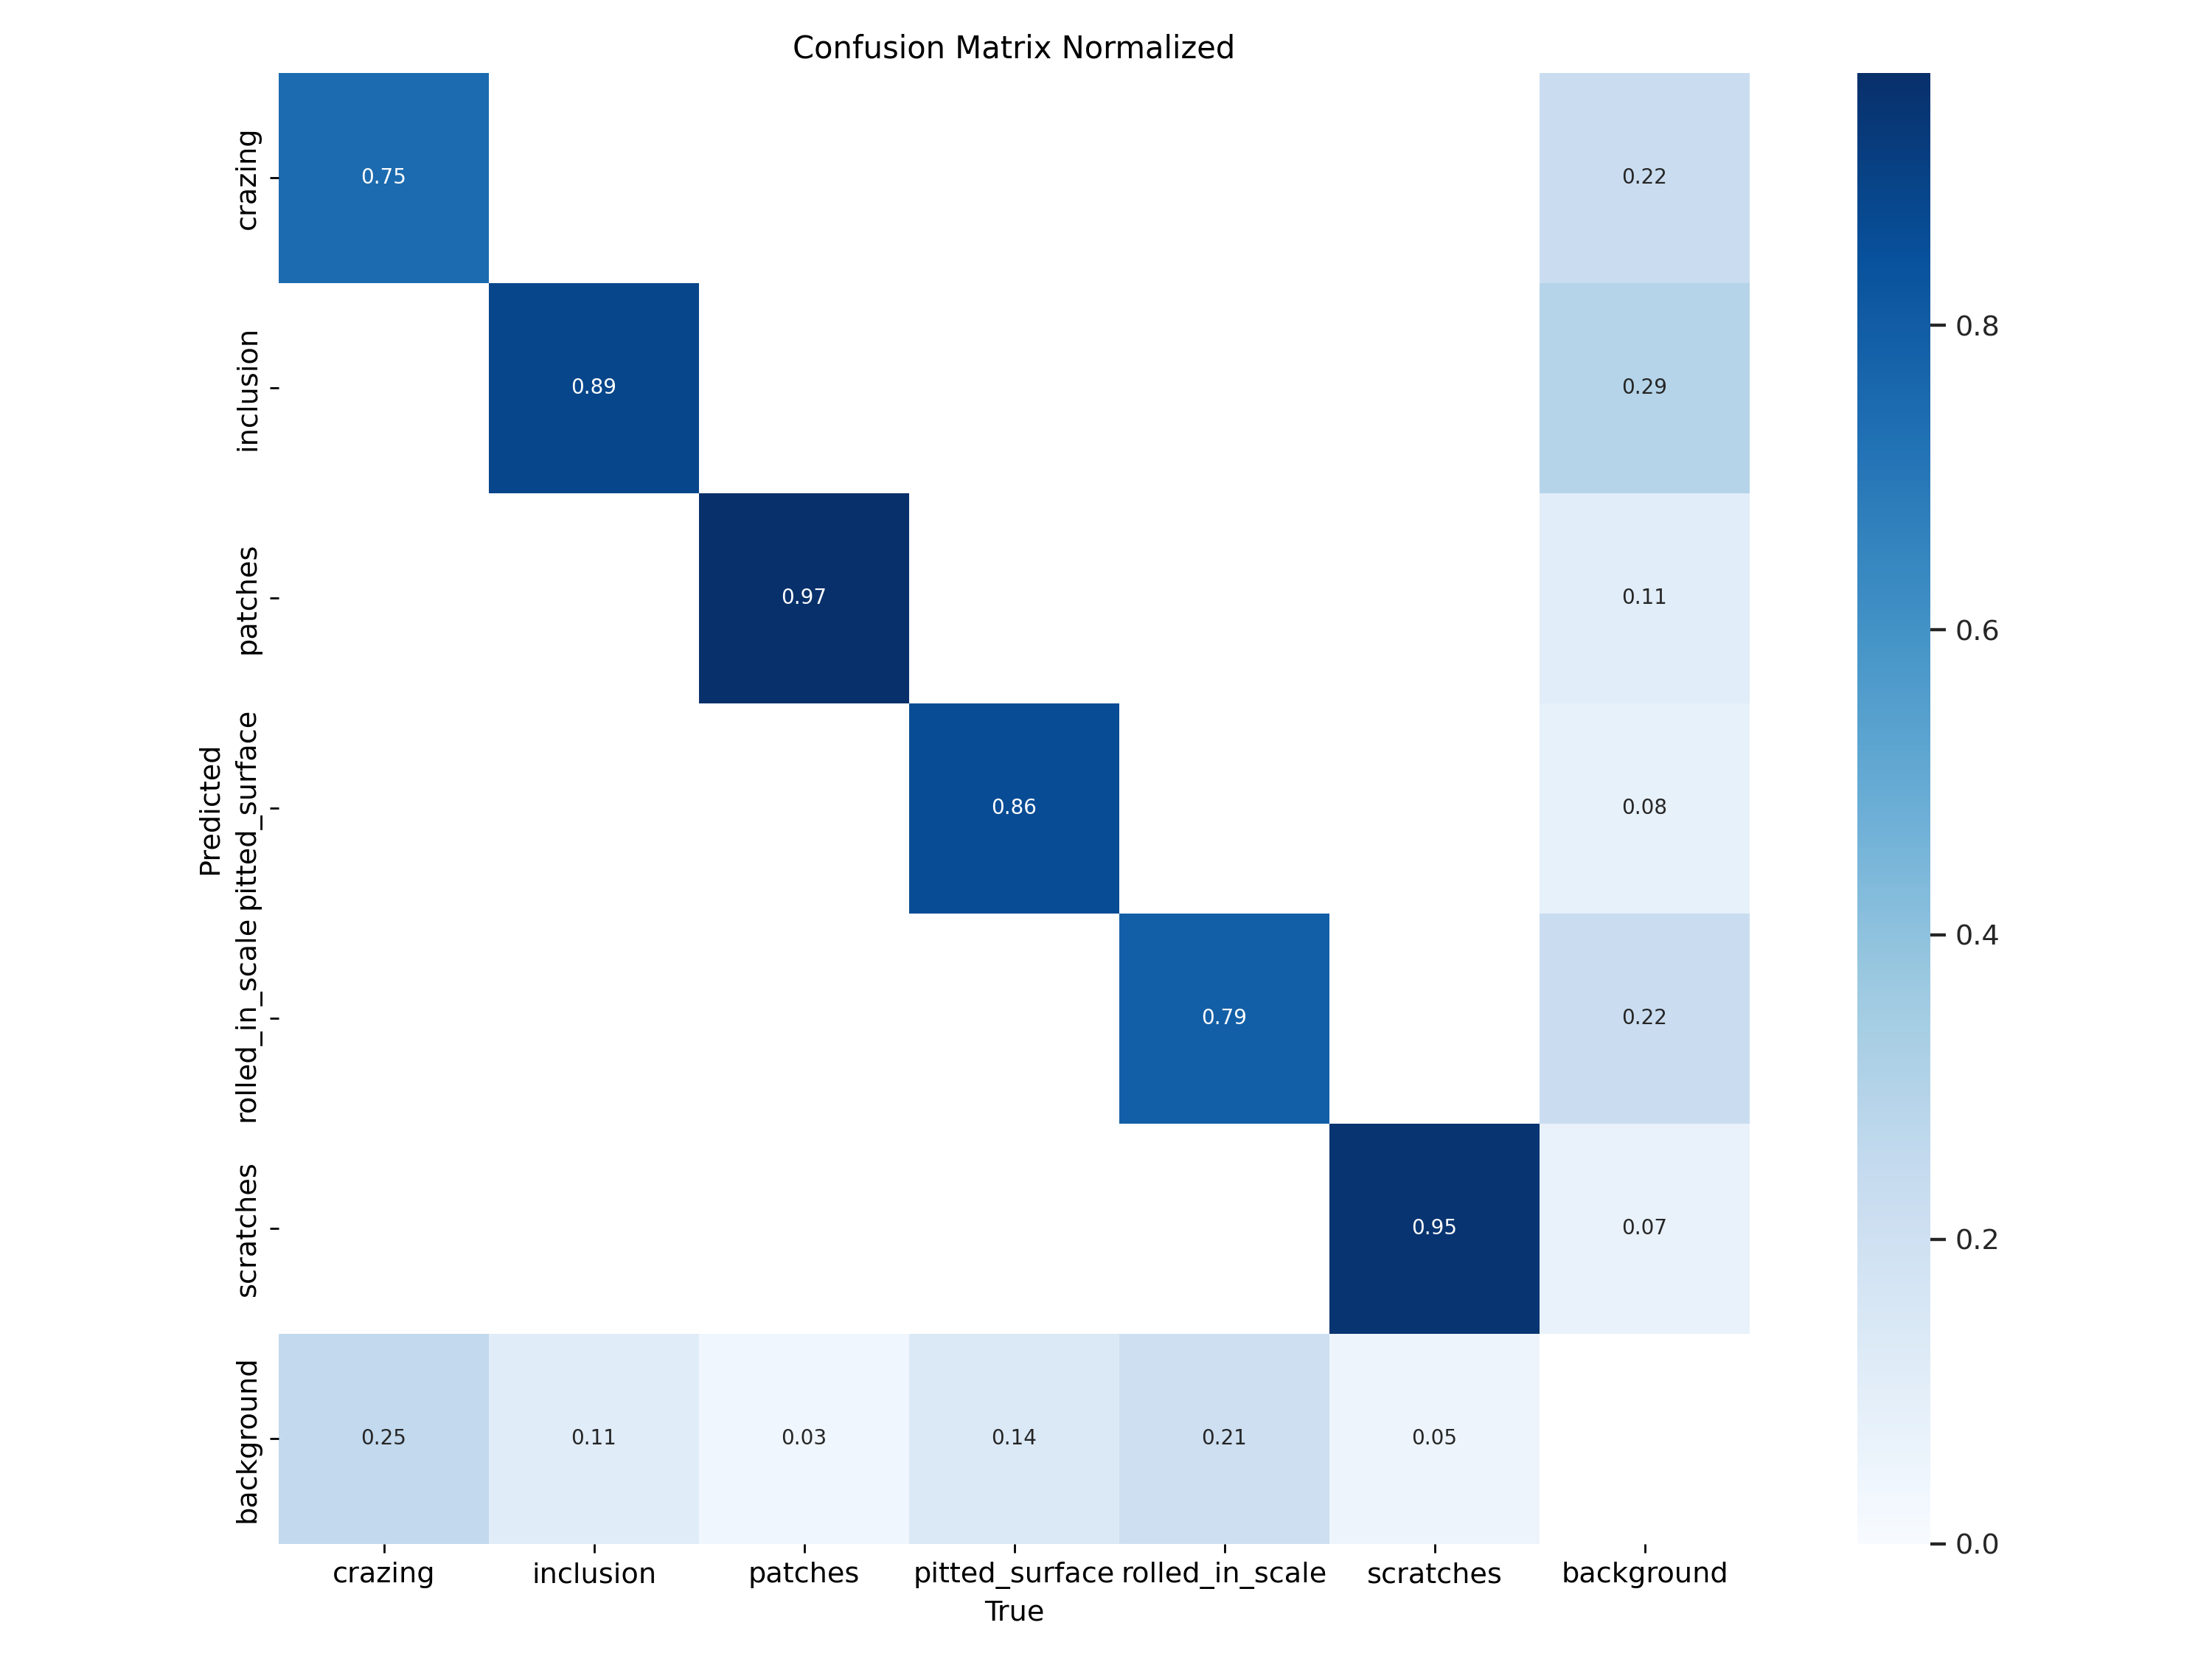

In [ ]:
Image("/content/confusion_matrix_normalized.png", width=600)

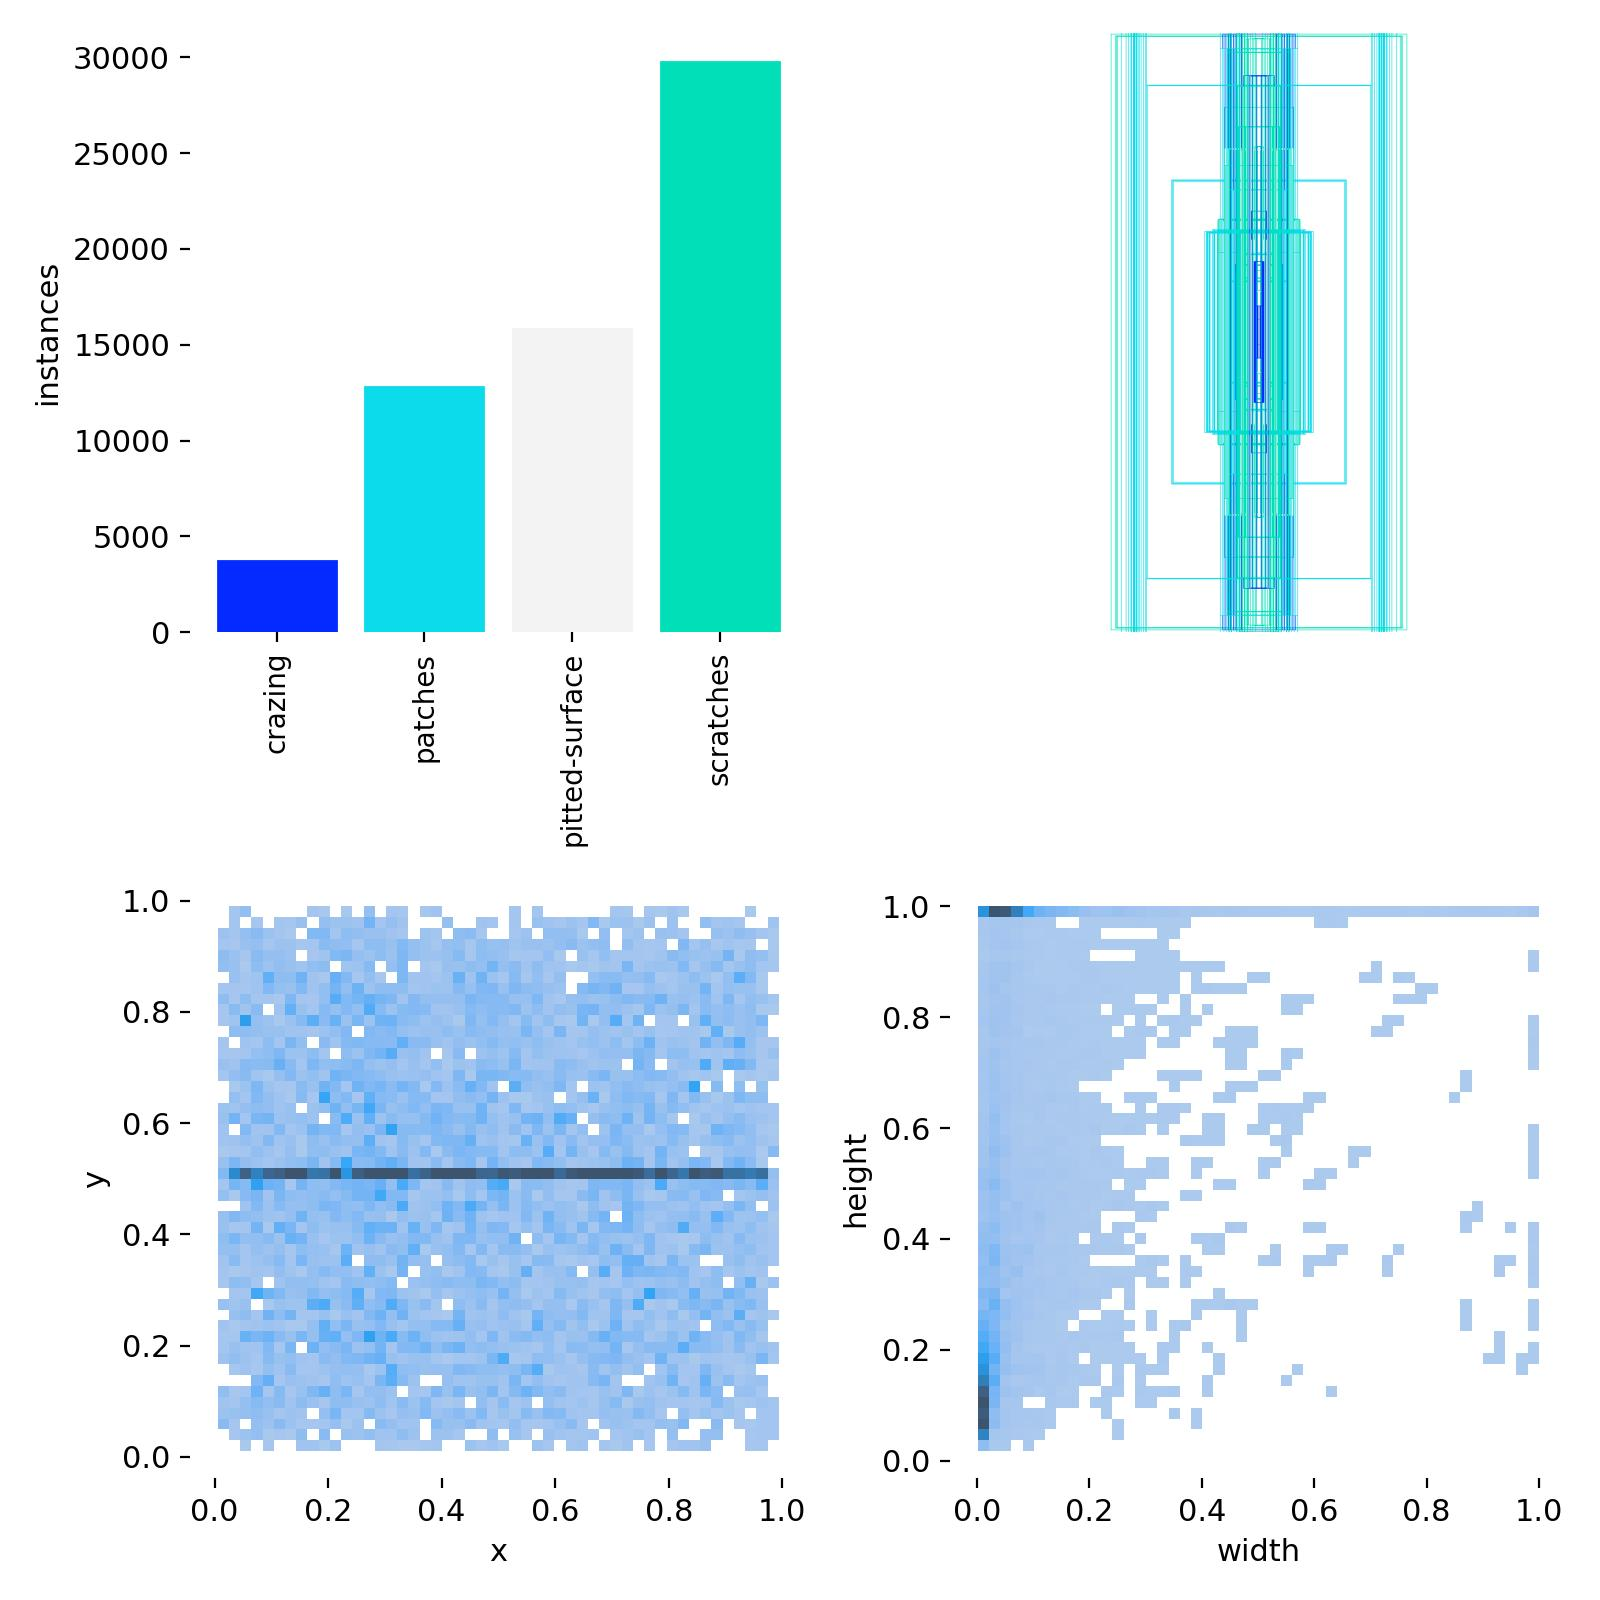

In [ ]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

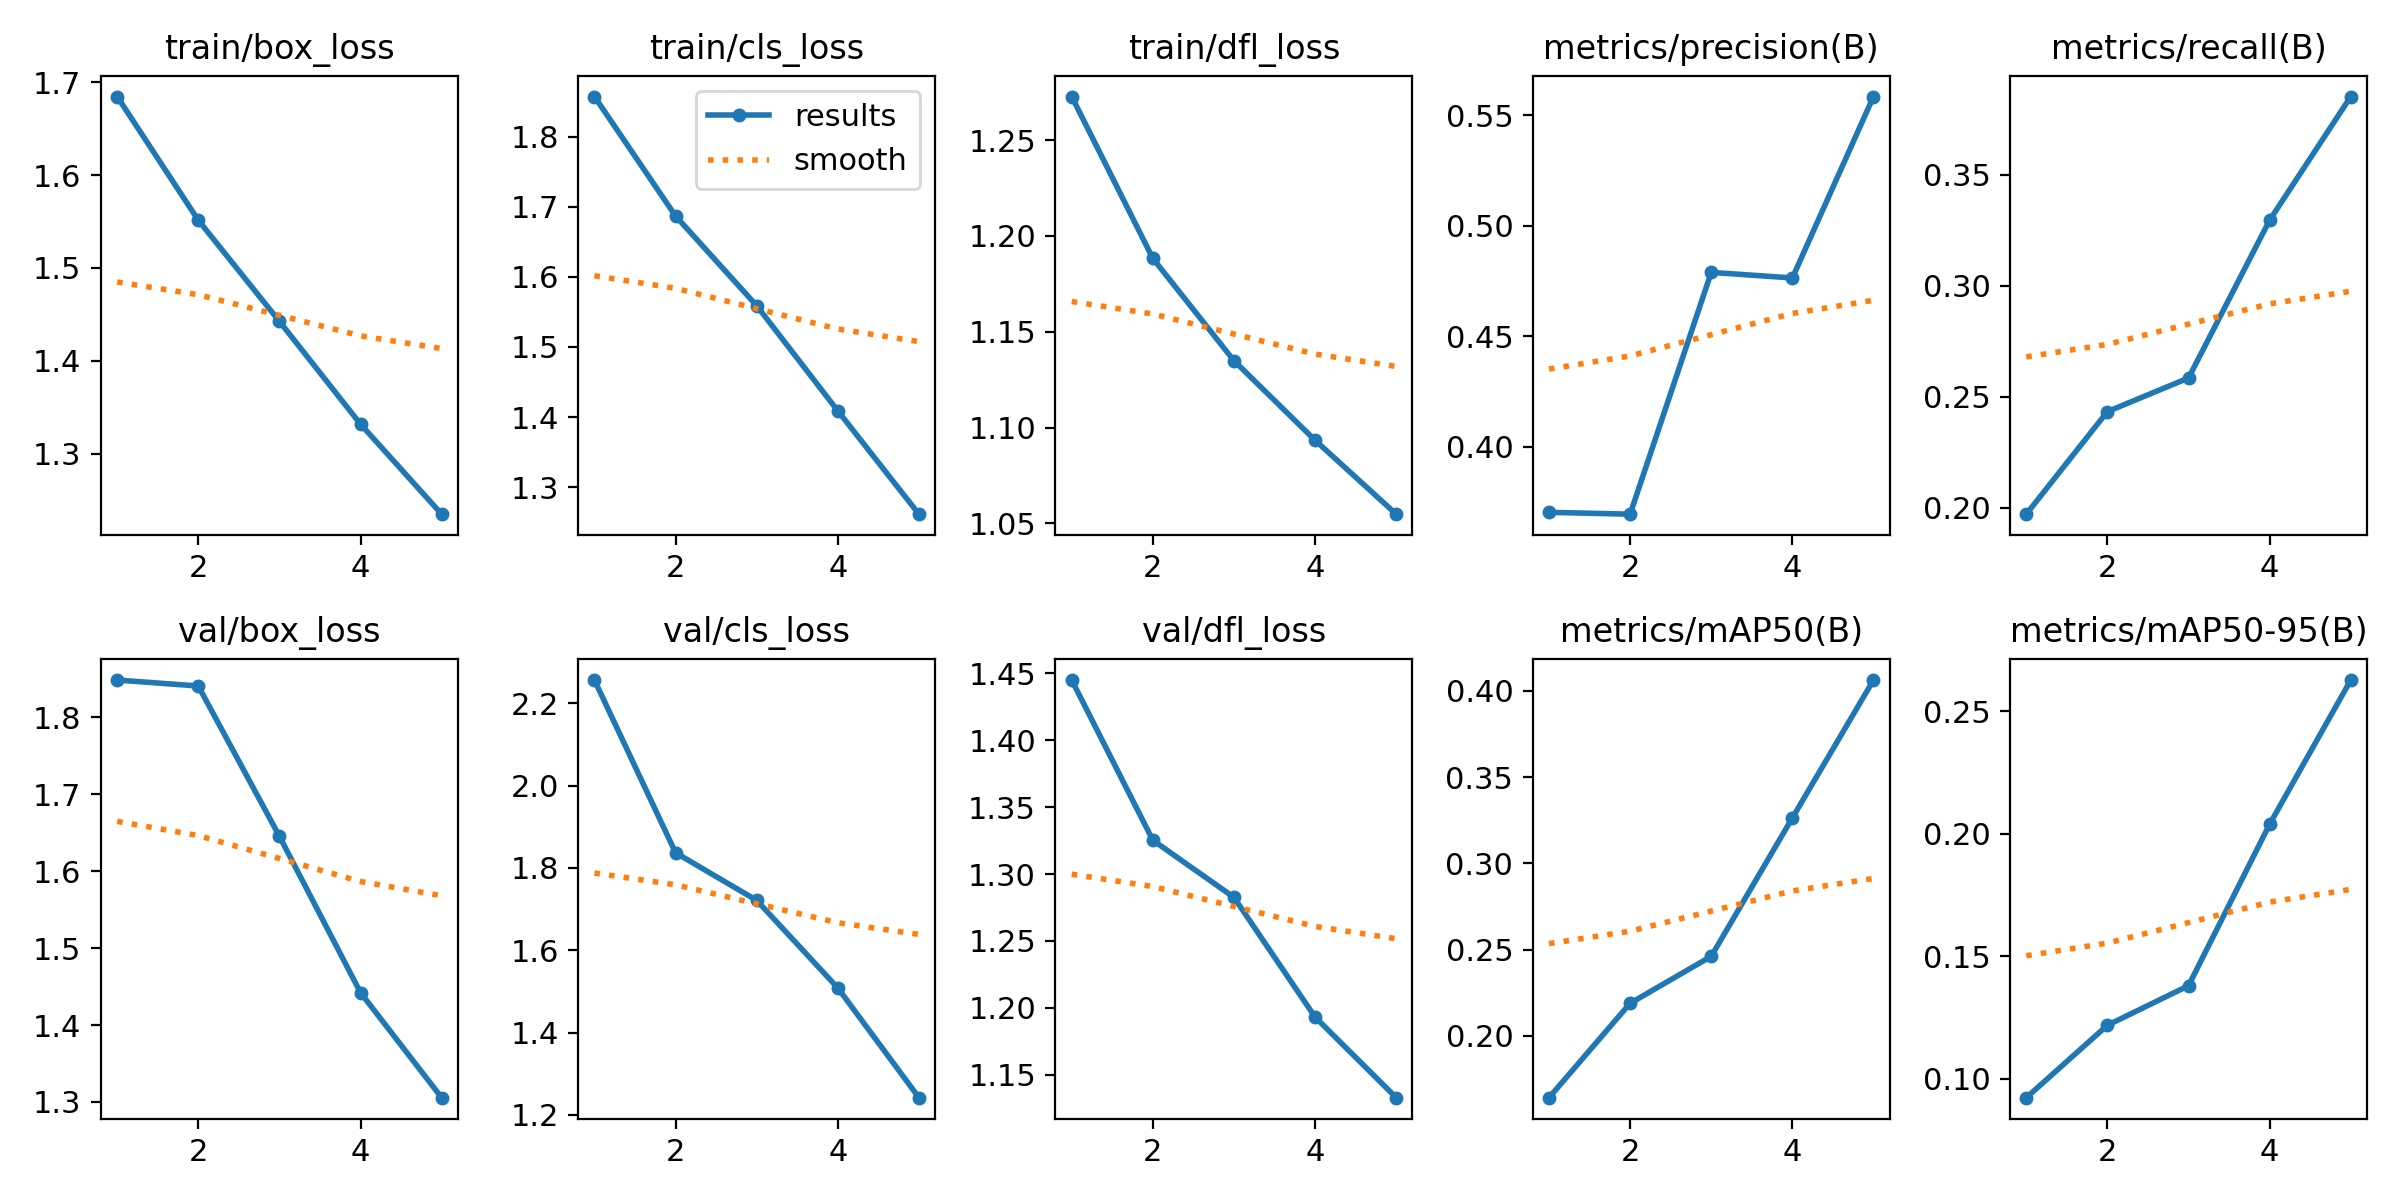

In [ ]:
Image("/content/runs/detect/train2/results.png", width=600)

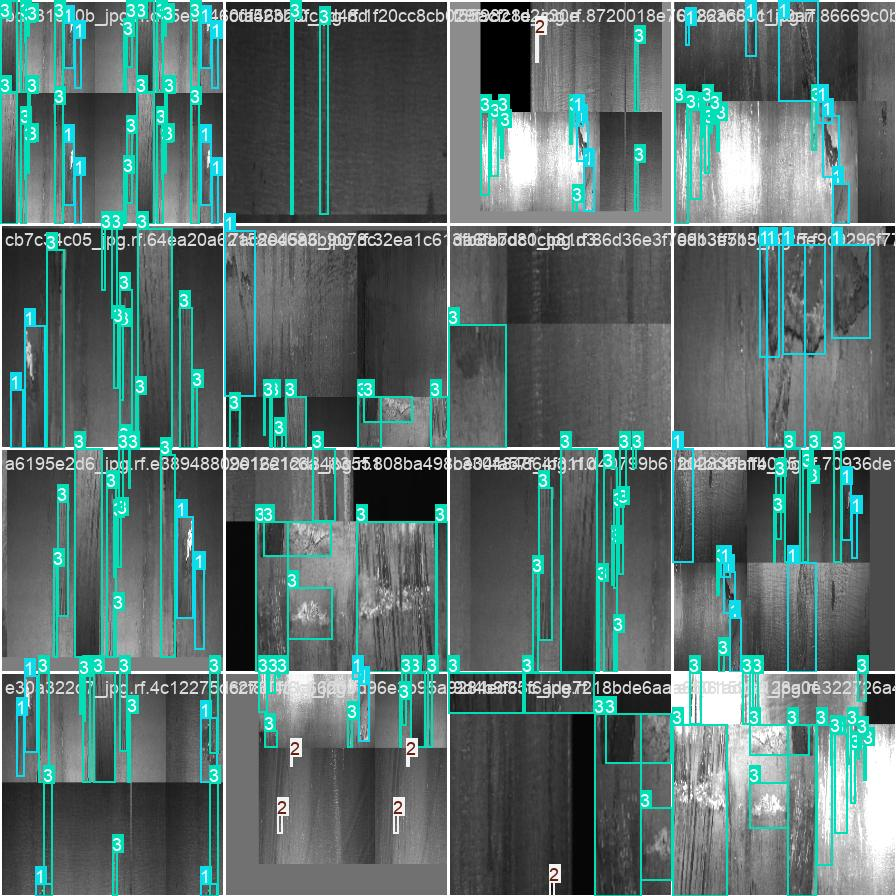

In [ ]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

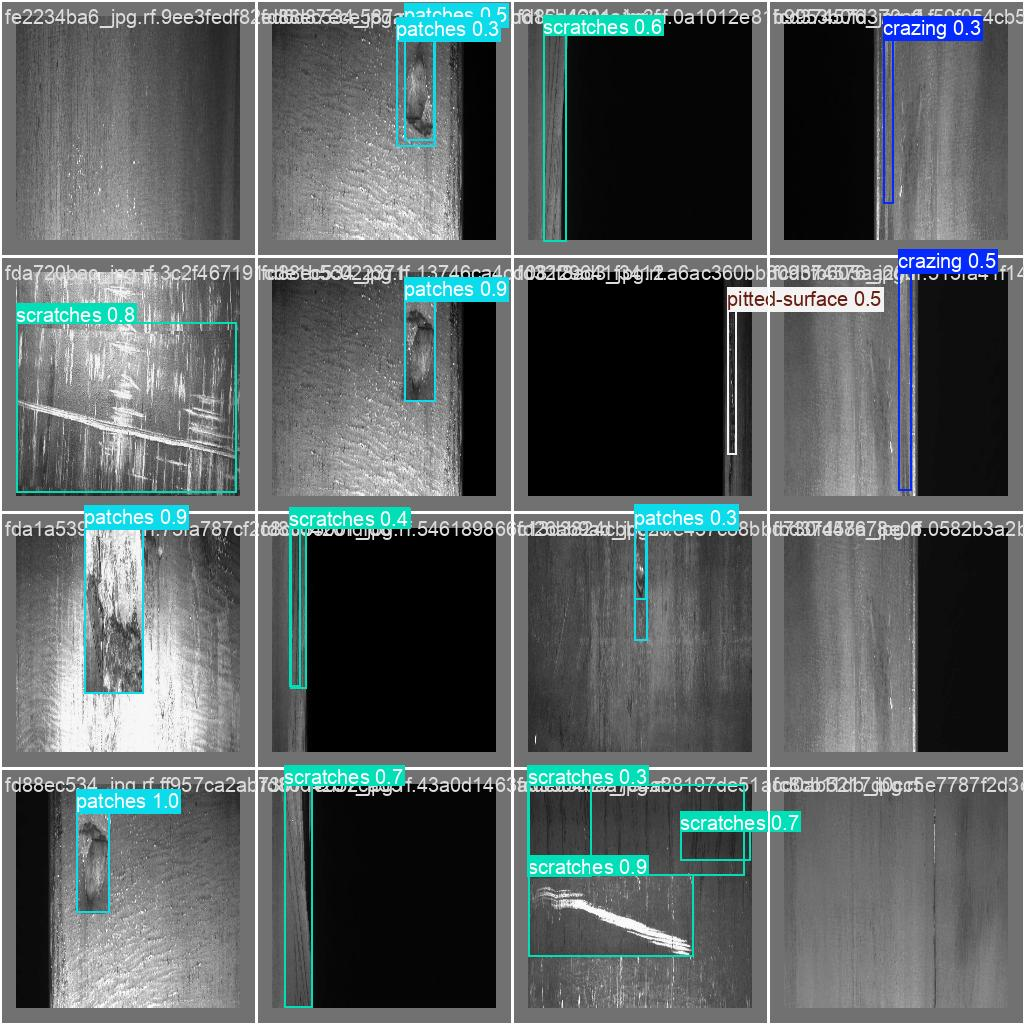

In [ ]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

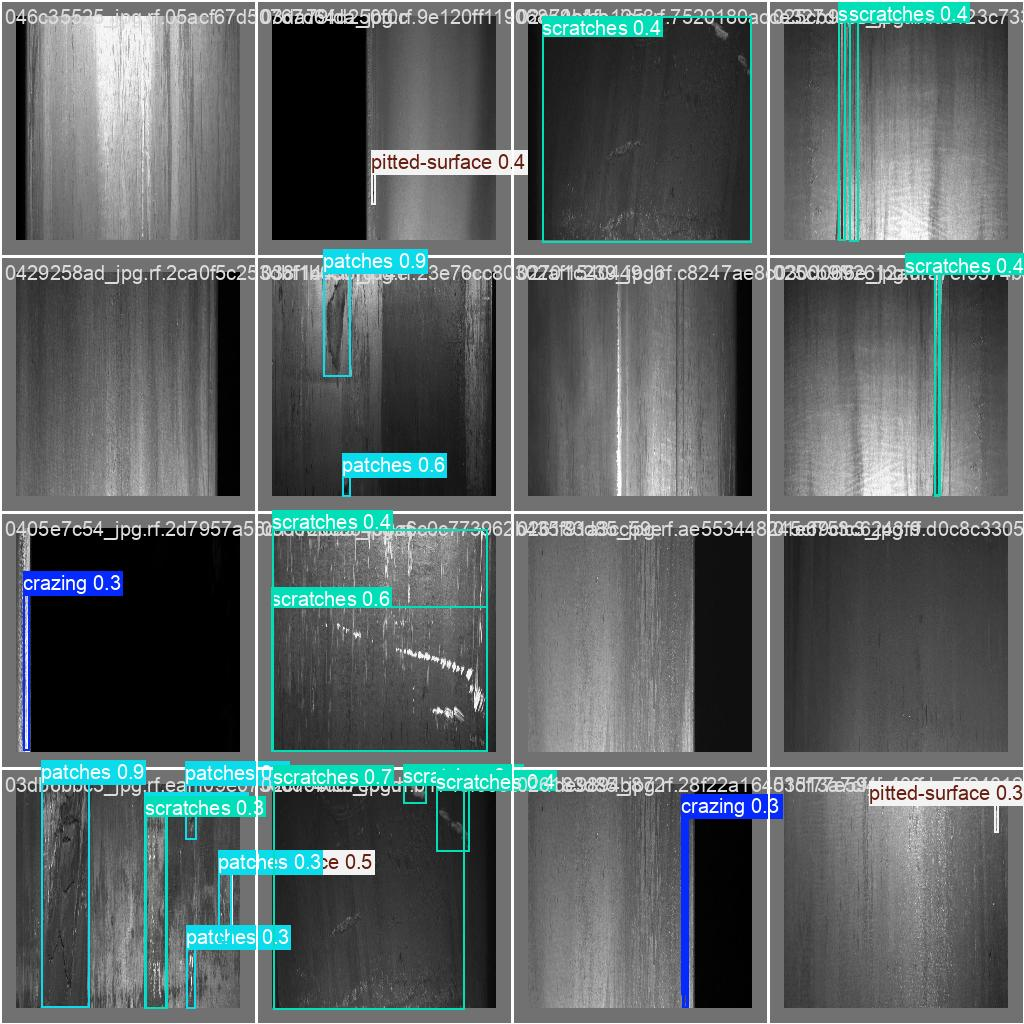

In [ ]:
Image("/content/runs/detect/train2/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/severstal-aug-v2-1/valid/labels.cache... 1999 images, 41 backgrounds, 0 corrupt: 100% 1999/1999 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 125/125 [00:14<00:00,  8.36it/s]
                   all       1999       5945      0.561      0.384      0.406      0.263
               crazing        279        364      0.507       0.33      0.329      0.176
               patches        573       1176       0.64      0.707      0.733      0.549
        pitted-surface        609       1623      0.492      0.144      0.175     0.0817
             scratches        794       2782      0.608      0.357      0.386      0.245
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn m

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs

image 1/999 /content/severstal-aug-v2-1/test/images/000f6bf48_jpg.rf.db3fed6c439b1a2ea5110fb8458d23a2.jpg: 224x224 2 patchess, 15.1ms
image 2/999 /content/severstal-aug-v2-1/test/images/0025bde0c_jpg.rf.40894a960b6a8fe80807edaf56f54bc6.jpg: 224x224 3 patchess, 2 scratchess, 13.3ms
image 3/999 /content/severstal-aug-v2-1/test/images/0025bde0c_jpg.rf.6a84f048fcdd5ad0c4f8a2cf3981e1f2.jpg: 224x224 2 patchess, 1 scratches, 11.6ms
image 4/999 /content/severstal-aug-v2-1/test/images/002fc4e19_jpg.rf.f2fb03cfe10f387db24e3216e8db0bf6.jpg: 224x224 (no detections), 11.6ms
image 5/999 /content/severstal-aug-v2-1/test/images/008621629_jpg.rf.8582434d9a55f62e9d42a864f655b3f4.jpg: 224x224 2 patchess, 11.6ms
image 6/999 /content/severstal-aug-v2-1/test/images/008ef3d74_jpg.rf.c9dc651a480c3231ba15d8c7689be1a5.jpg: 224x224 1 crazing, 1 pi

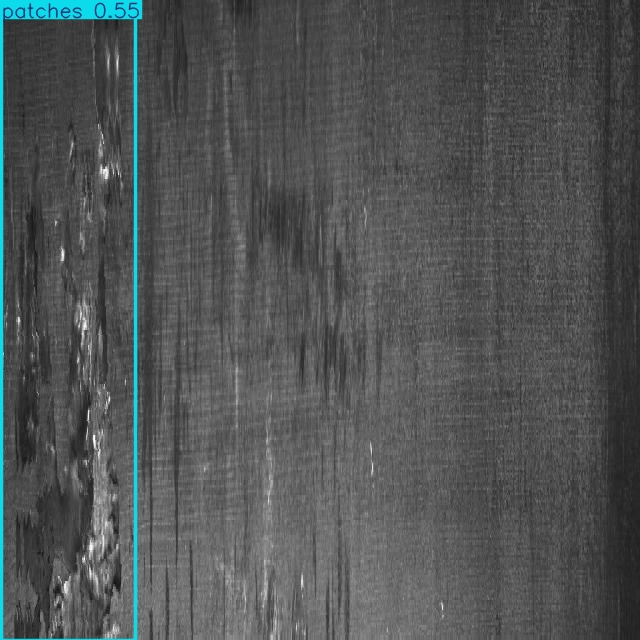

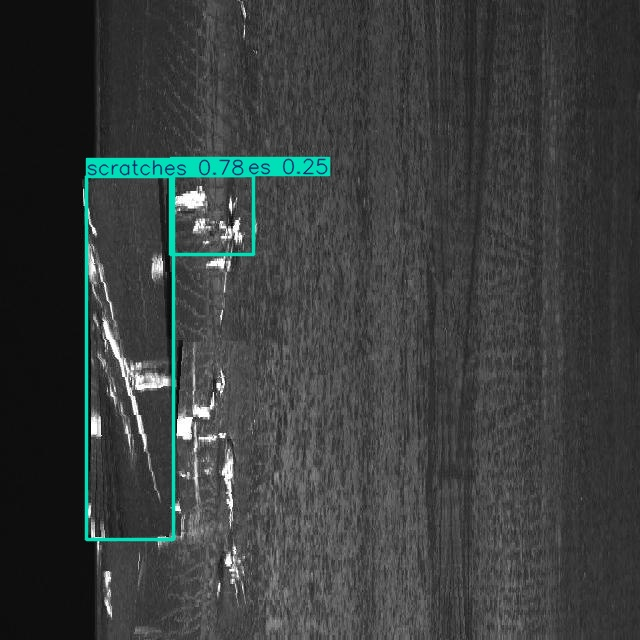

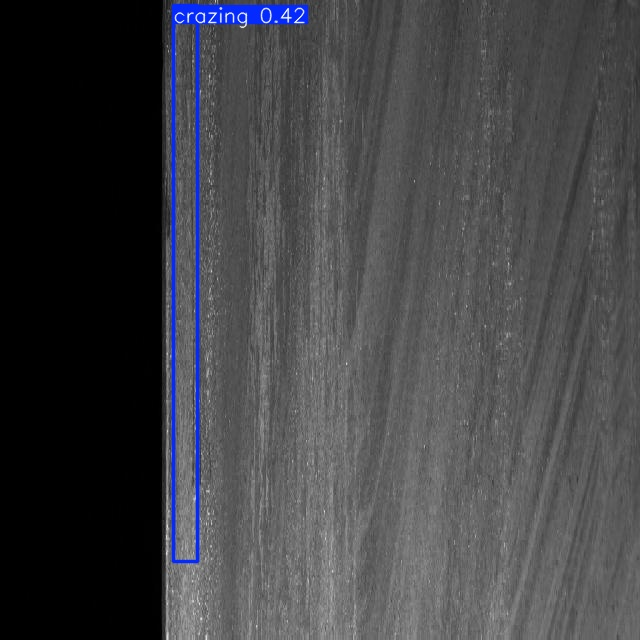

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")